- Preprocess the happiness data
- Determine optimal clusters using the elbow method
- Visualize country clusters
- Create an interactive 3D plot to show group differences

- Loading necessary lib

In [1]:
! pip install bubbly
! pip install iplot
! pip install chart_studio

  Preparing metadata (setup.py) ... done
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5414 sha256=3738cc6210ceefab551b56d007e81c46f298f5c2a430010ed77a964f3bbe9c59
  Stored in directory: /root/.cache/pip/wheels/83/9a/47/387700a4f2acbdf0b606f3a389913db17982d52e25ee5f9187
Successfully built bubbly
ERROR: Could not find a version that satisfies the requirement iplot (from versions: none)
ERROR: No matching distribution found for iplot
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

- Importing dataset into colab

In [3]:
happy_df = pd.read_csv('/content/happy.csv')
happy_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
happy_df.nunique()

,0
Overall rank,156
Country or region,156
Score,155
GDP per capita,146
Social support,145
Healthy life expectancy,119
Freedom to make life choices,130
Generosity,118
Perceptions of corruption,113


In [5]:
happy_df.shape[0] ,

(156,)

- Just for FUN

In [6]:
happy_df[happy_df['Country or region'] == 'Myanmar']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
130,131,Myanmar,4.36,0.71,1.181,0.555,0.525,0.566,0.172


In [7]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


- we have no null value

In [8]:
happy_df.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [9]:
happy_df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


- let's check if there any duplicate values

In [10]:
happy_df.duplicated().sum()

np.int64(0)

- Now lets see correlation ( plot first! peaerson r later )

<Figure size 2000x2000 with 0 Axes>

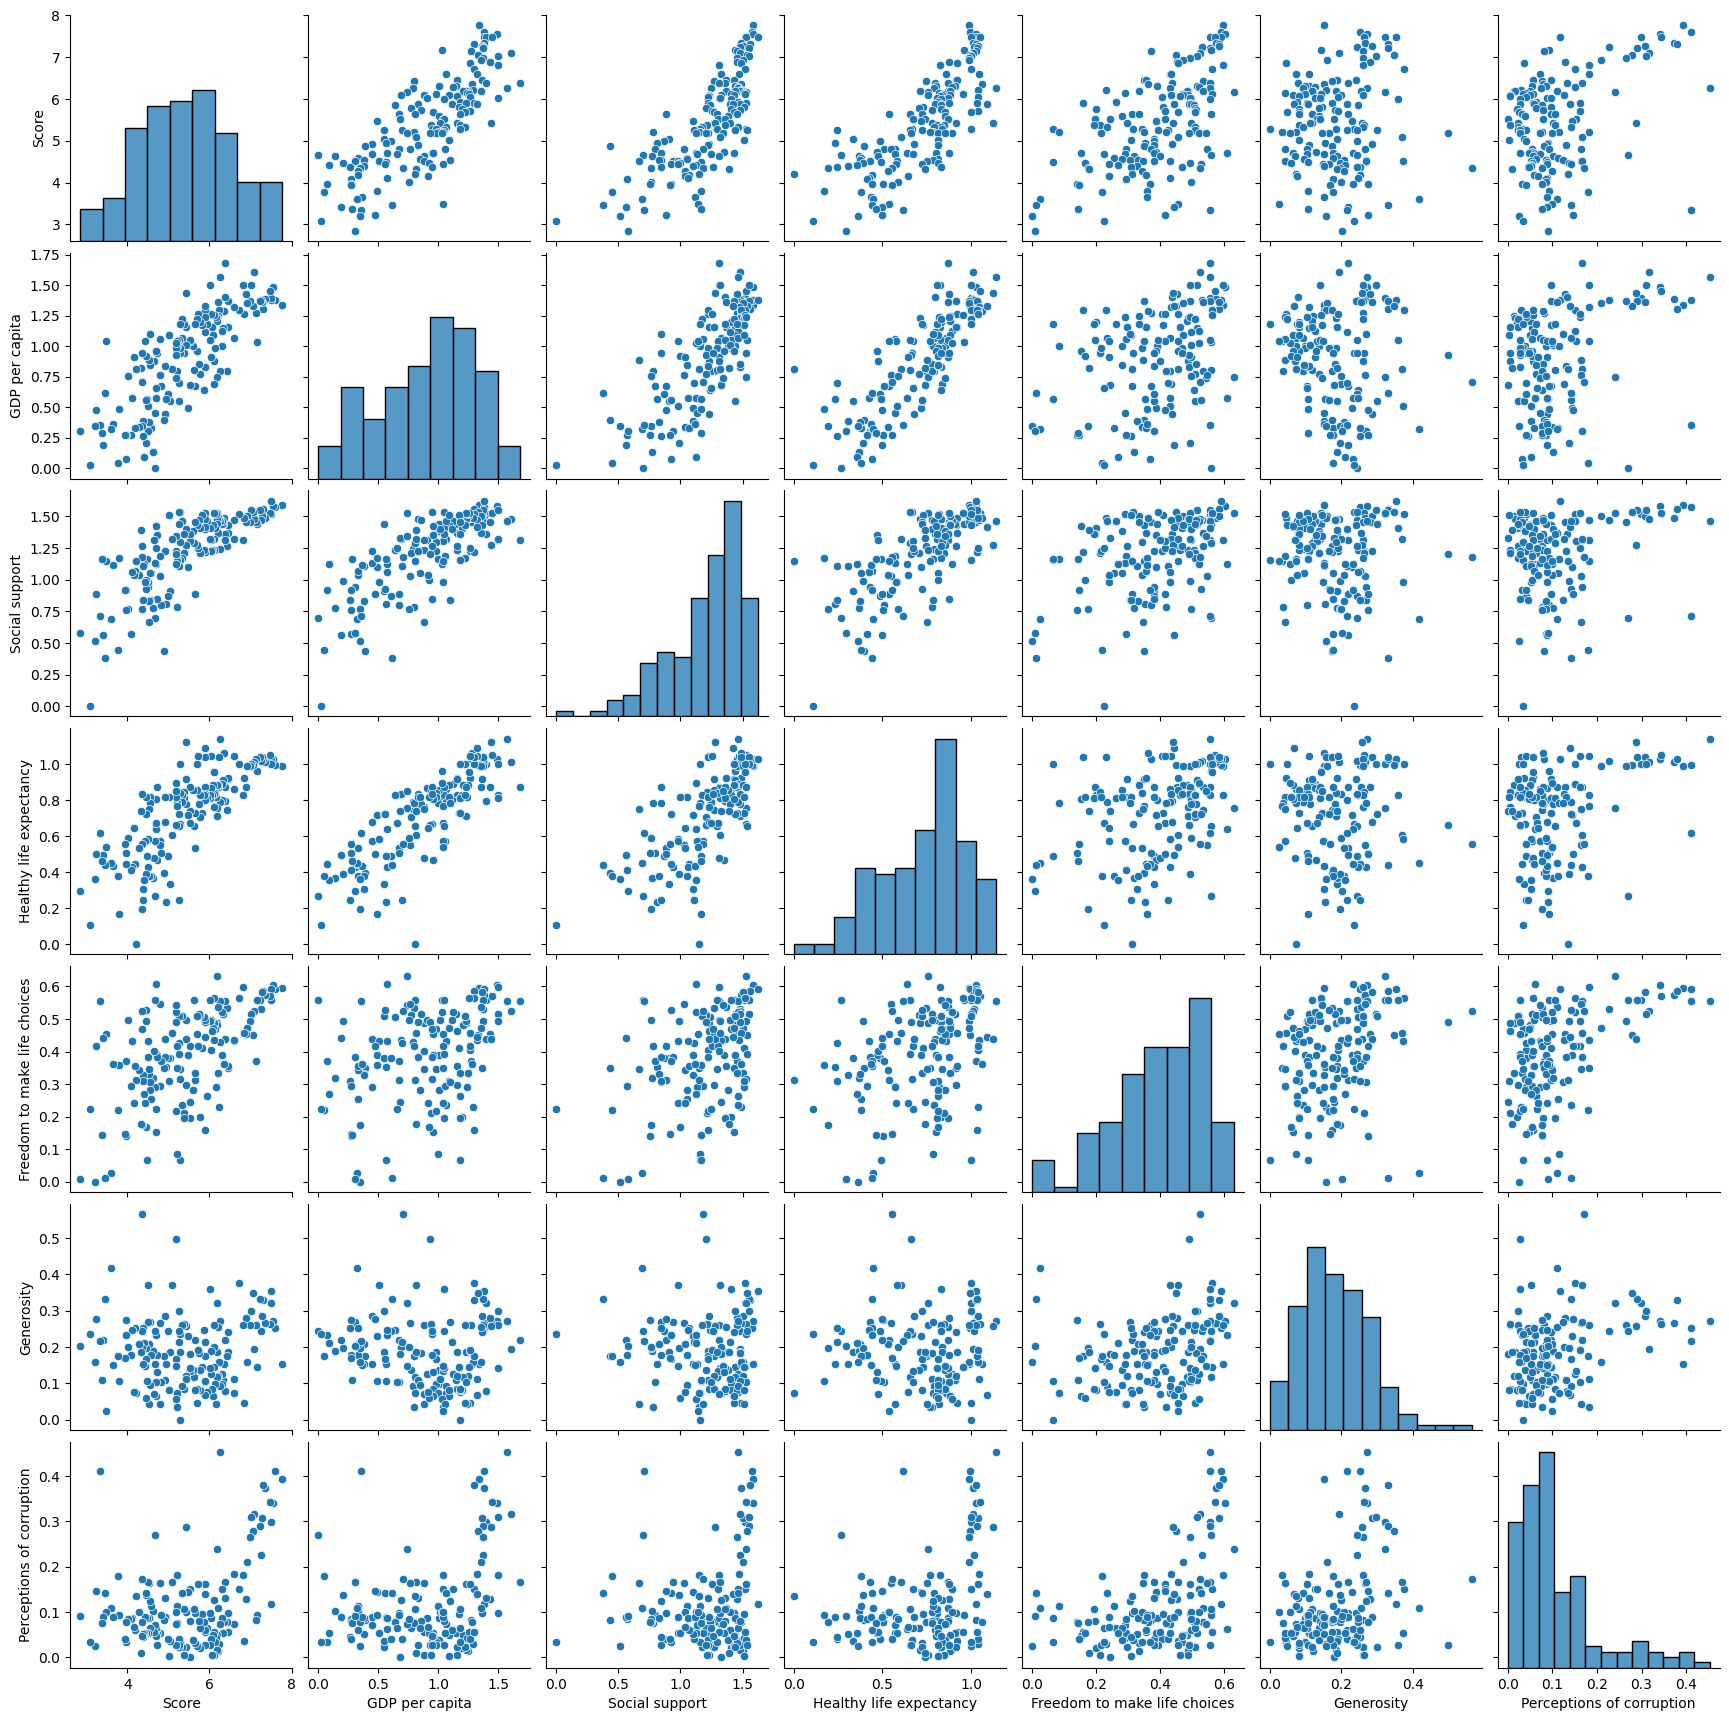

In [11]:
fig = plt.figure(figsize = (20,20))
columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
sns.pairplot(happy_df[columns])

- Based on visual, I can assume that score ( our target ) has a strong positive correlation with GDP , social support and healthy life
- But lets plot Pearson r

In [12]:
corr_matrix = happy_df[columns].corr()
corr_matrix

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<Axes: >

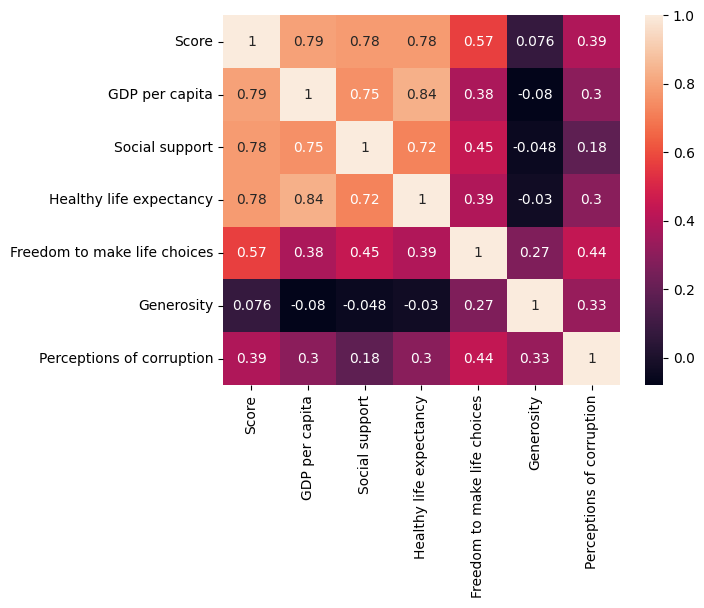

In [13]:
sns.heatmap(corr_matrix,annot = True)

In [14]:
happy_df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

- Let's prepare data to feed into model
- Since we are using kmeans ( unsupervised ML ) , I dont need to feed target column
- So, I am gonna drop overall rank , country or region and score )
- But first I am gonna do one thing that I should have done earlier --> removing spaces in column names

In [15]:
happy_df.columns = happy_df.columns.str.strip()
happy_df.columns = happy_df.columns.str.replace(' ','_')

In [16]:
happy_df.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

- Now we are all set to drop columns which are not necessay or useful for kmeans

In [17]:
col_to_drop = ['Overall_rank','Country_or_region','Score']
happy_df_1 = happy_df.copy()
happy_df_1.drop(col_to_drop,axis = 1,inplace = True)

In [18]:
happy_df_1.head()

,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298


- Since kmeans is distane based model , I should scale my values ( input )

In [19]:
sc = StandardScaler()
happy_df_2= sc.fit_transform(happy_df_1)

In [20]:
happy_df_2.shape

(156, 6)

- For K-Means algo, we need to find optimal value of K.
- I will iterate a series of K so that I can find optimal K.
- for each K , I will calculate WCSS ( within cluster sum of squares )
- Will choose the best K using elbow method.

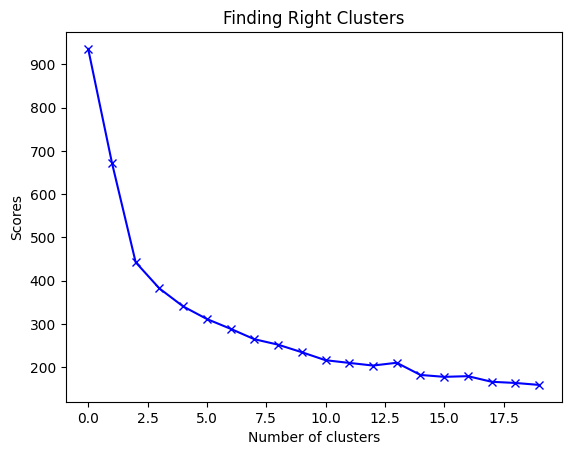

In [21]:
scores = [] # for each K return
range_val = range(1,21) #for K iternation

for i in range_val:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(happy_df_2)
  scores.append(kmeans.inertia_) # to get WCSS

plt.plot(scores , 'bx-')
plt.title('Finding Right Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.show()

- According to graph , I assume the right K will be around 3-4-5.
- So I am gonna try with this.

In [22]:
kmeans = KMeans(n_clusters= 3) # just trusting in 4
kmeans.fit(happy_df_2)

KMeans(n_clusters=3)

In [23]:
labels = kmeans.labels_ # checking how many points are in each cluster

- I can also check my centers

In [24]:
kmeans.cluster_centers_

array([[-1.26422926, -1.1321435 , -1.24034126, -0.47156319,  0.26057036,
        -0.11435828],
       [ 1.0440483 ,  0.84045675,  0.88671774,  1.04395863,  1.20151704,
         1.46865179],
       [ 0.35269748,  0.34811966,  0.39301953, -0.09193823, -0.55644773,
        -0.43733865]])

- Now I am going to create a df with columns from original df and center for each col

In [25]:
cluster_cent = pd.DataFrame(data = kmeans.cluster_centers_ , columns = happy_df_1.columns)
cluster_cent

,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,-1.264229,-1.132144,-1.240341,-0.471563,0.260570,-0.114358
1,1.044048,0.840457,0.886718,1.043959,1.201517,1.468652
2,0.352697,0.348120,0.393020,-0.091938,-0.556448,-0.437339


- Now we can see center of each cluster for each column
- In order to see model's full potnetial , I have to reverse my scaled data into original data

In [26]:
cluster_centers = sc.inverse_transform(cluster_cent)
cluster_centers = pd.DataFrame(data = cluster_centers , columns = happy_df_1.columns)
cluster_centers

,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,0.403109,0.871174,0.425891,0.325217,0.209587,0.099826
1,1.319750,1.459464,0.939250,0.541679,0.298929,0.249000
2,1.045207,1.312634,0.820098,0.379439,0.132012,0.069390


- As we can see , group 1 has highest values for each columns with 1.3 GDP as center and ~1.4 social support. etc.
- Group 0 has lowest value for most of the columns
- So we can say that our model has grouped all 156 countries into 4 groups.

### Now let's predict our data using the model ( which use K as 3 )

In [27]:
y_kmeans = kmeans.fit_predict(happy_df_2)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

- Now we will concat predicted result group to each country in original df

In [28]:
happy_df_cluster = pd.concat([happy_df,pd.DataFrame(y_kmeans,columns = ['Group'])],axis = 1)

In [29]:
happy_df_cluster

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Group
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0


- Here,after we concat , finland and other top ranked countries belong to group 1 and lowest ranked countries belong to group 0.

- Now It is time for final data visualization to see how well my model can do.

In [30]:
fig = px.scatter_3d(
    happy_df_cluster,
    x='GDP_per_capita',
    y='Perceptions_of_corruption',
    z='Healthy_life_expectancy',
    color='Group',  # or 'Cluster' depending on what you named it
    size='Score',
    hover_name='Country_or_region',
    opacity=0.7,
    size_max=30,
    title='3D Happiness Clusters Bubble Chart'
)

fig.update_layout(scene=dict(
    xaxis_title='GDP per Capita',
    yaxis_title='Perceptions of Corruption',
    zaxis_title='Healthy Life Expectancy'
))

fig.show()


###Although the model has some prediction errors , it performed pretty well overall.